In [1]:
#Import numpy and matplotlib.pyplot
import numpy as np
import matplotlib.pyplot as plt

Exercise 1: Write a program to compare the standard Euler method and the Euler-Comer method applied to a particle travling in one dimension. Given a force $F(x) = -kx-bx^3$, Newton's equation takes the form 
$$\begin{align*} \dot{v}&=-kx-bx^3\\ \dot{x}&=v \end{align*}$$

Start with $k=1$ and $b=4$. Plot velocity $v$ vs $x$, and $x$ vs time $t$. 

In [2]:
#Define the force 
k = 1
b = 4
F = lambda x: -k*x-b*(x**3)

In [3]:
#=============================
#Euler Method
#=============================

#Initialize arrays for position, velocity, and time data to plot later
x_e = []
v_e = []
t_e = []

#Set Initial Conditions by assigning values to position[0] and velocity[0]
x_e.append(1)
v_e.append(0)
t_e.append(0)

In [4]:
#Define a step length \Delta t
step = 0.01

#Define number of steps 
N = 1200

#Write loop implementing Euler Method
for i in range(0,N):
  f = F(x_e[i])
  x_new = x_e[i]+v_e[i]*step
  v_new = v_e[i]+f*step
  x_e.append(x_new)
  v_e.append(v_new)
  t_e.append(t_e[i]+step)

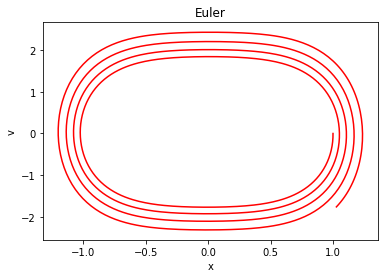

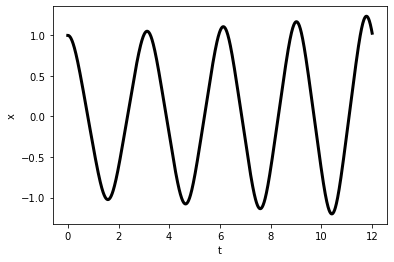

In [5]:
#Plot the velocity vs position
plt.figure(1)
plt.plot(x_e,v_e,'r')
plt.xlabel('x')
plt.ylabel('v')
plt.title('Euler')

#Plot position vs time
plt.figure(2)
plt.plot(t_e,x_e,'k',linewidth=3)
plt.xlabel('t')
plt.ylabel('x')

plt.show()

In [6]:
#=============================
#Euler-Cromer Method
#=============================

#Initialize data
x_ec = []
v_ec = []
t_ec = []

#Set Initial Conditions
x_ec.append(1)
v_ec.append(0)
t_ec.append(0)

In [7]:
#Define step length
step = 0.01

#Define number of steps 
N = 1200

#Write loop implementing Euler-Cromer Method
for i in range(0,N):
  f = F(x_ec[i])
  v_new = v_ec[i]+f*step
  x_new = x_ec[i]+v_new*step
  x_ec.append(x_new)
  v_ec.append(v_new)
  t_ec.append(t_ec[i]+step)

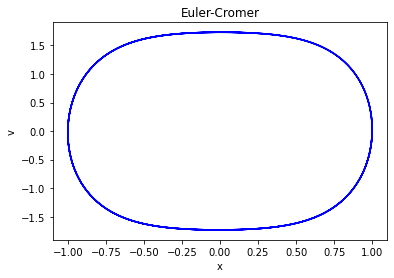

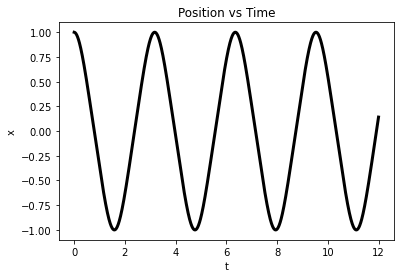

In [8]:
#Plot the velocity vs position
plt.figure(3)
plt.plot(x_ec,v_ec,'b')
plt.title('Euler-Cromer')
plt.xlabel('x')
plt.ylabel('v')
plt.title('Euler-Cromer')
#plt.grid('on')
plt.figure(4)
plt.plot(t_ec,x_ec,'k',linewidth=3)
plt.title('Position vs Time')
plt.xlabel('t')
plt.ylabel('x')
#plt.grid('on')

plt.tight_layout
plt.show()

Exericse 2: Apply Euler-Cromer to the 2D problem of a mass $m$ under the influence of gravity from two other bodies $M_1$ and $M_2$. Let $R$ denote the distance from $m$ to $M_1$, $d$ the distance between $m$ and $M_2$, and $D$ the distance between $M_1$ and $M_2$. The equations of motion describing the position of mass $m$ at timne $t$ are 

$$\begin{align*}\ddot{x} &= -\frac{GM_1}{R^3}x-\frac{GM_2}{d^3}(x-D)\\
\ddot{y} &= -\frac{GM_1}{R^3}y-\frac{GM_2}{d^3}y. \end{align*}$$

Note that 

$$\begin{align*} R&=(x^2+y^2)^{1/2}\\ d&=\big( (x-D)^2+y^2 \big)^{1/2}. \end{align*}$$ 

For details, see [Euler's three-body problem](https://github.com/mdallas1/ApplyIt/tree/main/sp23/Euler-Cromer/papers/wild79.pdf). You may assume for now that $M_1=M_2$ and $GM=10$. Suggested initial conditions can be found in [Stable solutions using the Euler approximation](https://github.com/mdallas1/ApplyIt/tree/main/sp23/Euler-Cromer/papers/cromer81.pdf). Two particularly nice paths result from the initial conditions $y(0)=0$, $\dot{x}(0)=0$, $\dot{y}(0)=2.3$, and choosing $x(0)=-2$ or $x(0)=-4$. Take $D=5.93$. 

In [9]:
#Define problem paramters G, M_1, M_2, and D.
GM = 10
D = 5.93

In [10]:
#Define force (should have two components)
def force(x,y):
    R = np.sqrt(x**2+y**2)
    d = np.sqrt(((x-D)**2)+(y**2))
    fx = -GM*(x/(R**3)+(x-D)/(d**3))
    fy = -GM*(y/(R**3)+y/(d**3))
    f = np.array([fx,fy])
    return f

In [11]:
#=============================
#Euler-Cromer Method
#=============================

#Initialize data
x_ec = []
y_ec = []
vx_ec = []
vy_ec = []
t_ec = []

#Set Initial Conditions
x_ec.append(-2)
y_ec.append(0)
vx_ec.append(0)
vy_ec.append(2.3)
t_ec.append(0)

In [12]:
#Define step length
step = 0.05

#Define number of steps 
N = 3000

#Write loop implementing Euler-Cromer Method
for i in range(0,N):
  f = force(x_ec[i],y_ec[i])
  fx = f[0]
  fy = f[1] 
  vx_new = vx_ec[i]+fx*step
  vy_new = vy_ec[i]+fy*step
  x_new = x_ec[i]+vx_new*step
  y_new = y_ec[i]+vy_new*step
  x_ec.append(x_new)
  y_ec.append(y_new)
  vx_ec.append(vx_new)
  vy_ec.append(vy_new)
  t_ec.append(t_ec[i]+step)

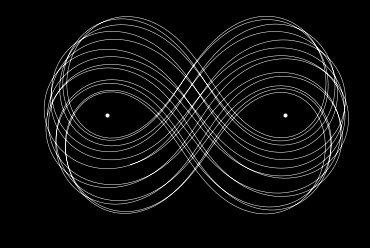

In [13]:
#Plot solution in xy-plane
plt.figure(1)
fig1 = plt.figure(1)
fig1.patch.set_facecolor('black')
ax = plt.axes()
ax.set_facecolor('black')
plt.plot(x_ec,y_ec,'w',linewidth=0.5)
plt.plot(0,0,'wo',5.93,0,'wo',markersize=3)
plt.show()


Exercise 3: Write a class or function that, given $M_1$, $M_2$, $D$, and $G$, solves the corresponding three body problem with the standard Euler method or Euler-Cromer (user's choice). Once this is done, add the *midpoint approximation* and *half-step approximation*.These methods can all be found in [Euler's three-body problem](https://github.com/mdallas1/ApplyIt/tree/main/sp23/Euler-Cromer/papers/wild79.pdf).

In [14]:
######################
#Class approach
######################

#Define a class that takes as inputs a force function F and initial conditions. An instance (object) of this class is a three-body system 
#to be solved. The methods of this class will be the various solvers mentioned above, e.g., standard Euler or the Euler-Cromer method. 
class three_body_p:
    #The __init__ function should take as inputs the value of M_1, M_2, the distance between them, and the initial conditions of mass m. 
    def __init__(self,mass1=0.0,mass2=0.0,dist=0.0,x0=0.0,y0=0.0,vx0=0.0,vy0=0.0):
        self.mass1 = mass1
        self.mass2 = mass2
        self.dist = dist
        self.x0 = x0
        self.y0 = y0
        self.vx0 = vx0
        self.vy0 = vy0
        #No need for input. Graviational Constant is well...constant.
        self.G = 6.6743e-11 

    def Force(self,x,y):
        R = np.sqrt(x**2+y**2)
        d = np.sqrt((x-self.dist)**2+(y**2))
        fx = -(self.G*self.mass1)*x/(R**3)-(self.G*self.mass2)*(x-self.dist)/(d**3)
        fy = -(self.G*self.mass1)*y/(R**3)-(self.G*self.mass2)*y/(d**3)
        f = np.array([fx,fy])
        return f

    def __str__(self):
        return f"{self.dist},({self.x0},{self.y0}),({self.vx0},{self.vy0})"

    def euler_cromer_method(self,step=0.0,iters=0):
        #Define step length
        self.step = step 
        #Number of iterations
        self.iters = iters
        #Initial Conditions
        x_ec = []
        y_ec = []
        vx_ec = []
        vy_ec = []
        x_ec.append(self.x0)
        y_ec.append(self.y0)
        vx_ec.append(self.vx0)
        vy_ec.append(self.vy0)
        #Write loop implementing Euler-Cromer Method for "iters" iterations
        for i in range(0,self.iters):
            f = self.Force(x_ec[i],y_ec[i])
            fx = f[0]
            fy = f[1] 
            vx_new = vx_ec[i]+fx*step
            vy_new = vy_ec[i]+fy*step
            x_new = x_ec[i]+vx_new*step
            y_new = y_ec[i]+vy_new*step
            x_ec.append(x_new)
            y_ec.append(y_new)
            vx_ec.append(vx_new)
            vy_ec.append(vy_new)
        #Plot solution in xy-plane
        plt.figure(1)
        fig1 = plt.figure(1)
        fig1.patch.set_facecolor('black')
        ax = plt.axes()
        ax.set_facecolor('black')
        plt.plot(x_ec,y_ec,'w',linewidth=0.5)
        plt.plot(0,0,'wo',self.dist,0,'wo',markersize=3)
        plt.show()

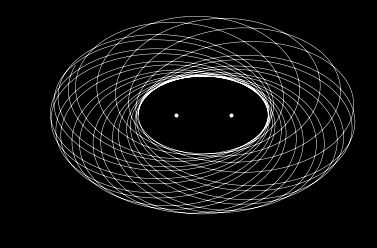

In [15]:
#Instantiate an object using the class above and apply one of the methods tos solve it. Plot the results. 
G = 6.6743e-11 

weave_path = three_body_p(mass1=10/G,mass2=10/G,dist = 5.93,x0=-4,y0=0,vx0=0,vy0=2.3)
weave_path.euler_cromer_method(0.2,6000)

    